In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# warming 제거
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

In [37]:
import matplotlib.pyplot as plt 
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

## airbnb.csv 관련 문제

In [53]:
airbnb=pd.read_csv('airbnb_listings.csv')
airbnb.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


1. 'price', 'review_scores_rating', 'latitude'에 대해서 변수의 종류는 무엇이며, 분포는 어떻게 되어있나요? 각 변수의 특징과 함께 서술해주세요!

In [54]:
airbnb[['price', 'review_scores_rating', 'latitude']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 3585 non-null   object 
 1   review_scores_rating  2772 non-null   float64
 2   latitude              3585 non-null   float64
dtypes: float64(2), object(1)
memory usage: 84.1+ KB


> price는 object(string)으로 숫자로 변환해주는 과정이 필요하다. 결측치는 없다.  
review_scores_rating은 float64이고 813개의 결측치가 존재한다.  
latitude는 float64이고, 결측치는 없다.

In [55]:
airbnb['price']

0       $250.00
1        $65.00
2        $65.00
3        $75.00
4        $79.00
         ...   
3580     $69.00
3581    $150.00
3582    $198.00
3583     $65.00
3584     $65.00
Name: price, Length: 3585, dtype: object

In [57]:
#가격을 float로 변환
airbnb['price'] = airbnb['price'].str[1:].str.replace(',', '').astype(float)
airbnb['price']

0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
        ...  
3580     69.0
3581    150.0
3582    198.0
3583     65.0
3584     65.0
Name: price, Length: 3585, dtype: float64

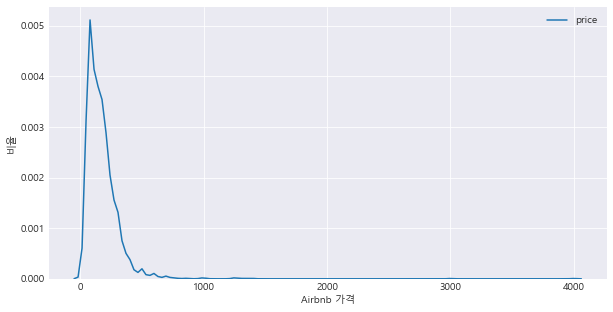

In [64]:
plt.figure(figsize=(10,5))
kde1=sns.kdeplot(airbnb['price']) 
kde1.set_xlabel("Airbnb 가격")
kde1.set_ylabel("비율")
plt.show() 

> Skewness가 심각하고, outlier가 있는 것으로 보인다. 가격이 지나치게 높은 airbnb는 허매물이라 분석에 적절하지 않을 수 있으므로 이를 제외하는 것이 적절해 보인다.

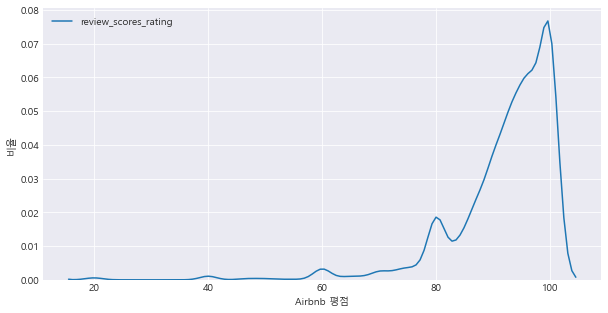

In [65]:
plt.figure(figsize=(10,5))
kde2=sns.kdeplot(airbnb['review_scores_rating']) 
kde2.set_xlabel("Airbnb 평점")
kde2.set_ylabel("비율")
plt.show() 

> 평점의 경우도 skewness가 심하고 평점이 아주 낮은 데이터가 존재하는 것으로 보인다. 이는 평점이 아직 등록이 되지 않은 airbnb일 수도 있다. 

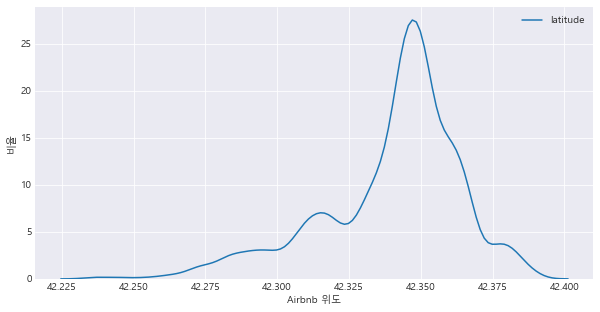

In [66]:
plt.figure(figsize=(10,5))
kde2=sns.kdeplot(airbnb['latitude']) 
kde2.set_xlabel("Airbnb 위도")
kde2.set_ylabel("비율")
plt.show() 

> 위의 두 데이터에 비해서는 skewness가 약하다. 분포가 넓지 않기 때문에, 특정 지역의 Airbnb에 대한 데이터라는 것을 알 수 있다.

In [67]:
airbnb[['price', 'review_scores_rating', 'latitude']].describe()

,price,review_scores_rating,latitude
count,3585.000000,2772.000000,3585.000000
mean,173.925802,91.916667,42.340032
std,148.331321,9.531686,0.024403
min,10.000000,20.000000,42.235942
25%,85.000000,89.000000,42.329995
50%,150.000000,94.000000,42.345201
75%,220.000000,98.250000,42.354685
max,4000.000000,100.000000,42.389982


> price의 경우 Q3가 220인데에 비해 max가 4000으로 가격대가 높은 매물의 경우 매우 넓게 분포되어있다는 것을 알 수 있다. rating의 경우 Q1이 89, median이 94로 75%의 데이터가 89점 이상임을 알 수 있다. 대부분의 매물들이 매우 후한 평점을 받고 있었다. latitude는 min이 42.235942, max가 42.389982로 매우 차이가 적다. 따라서 같은 지역에서 추출한 데이터임을 추측해볼 수 있다.

2. 위의 세 데이터에 이상치/결측치가 있나요? 있다면 어떻게 처리해야 할까요?

> price는 max가 매우 높게 나왔다. 이와 같은 outlier들은 특별한 특징을 갖고 있거나, 허매물일 가능성이 있다. 따라서 상위 1%의 데이터는 제거하고 분석하는 것이 좋아보인다.  
rating은 결측치가 813개고, rating 변수는 비교적 고른 분포를 보이기 때문에 이를 채우기 위해서 mean이나 median, 혹은 비슷한 가격대 매물들의 평균 rating 등을 적용하는 것이 좋을 것 같다. 하지만 평점과 다른 변수간의 상관관계를 알아보기 위해서는 결측치를 제거하는 것이 더 좋을 것이다. 

## summer_product.csv 관련 문제

In [68]:
sp = pd.read_csv('summer_product.csv')
sp.head(2)

,Unnamed: 0,title,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,...,tags,product_color,product_variation_inventory,origin_country,merchant_name,merchant_rating_count,merchant_rating,merchant_id,theme,crawl_month
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,0,...,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,50,CN,zgrdejia,568,4.128521,595097d6a26f6e070cb878d1,summer,2020-08
1,1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.0,22,EUR,20000,1,3.45,6135,0,...,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,50,CN,sarahouse,17752,3.899673,56458aa03a698c35c9050988,summer,2020-08


In [69]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1573 non-null   int64  
 1   title                        1573 non-null   object 
 2   price                        1573 non-null   float64
 3   retail_price                 1573 non-null   int64  
 4   currency_buyer               1573 non-null   object 
 5   units_sold                   1573 non-null   int64  
 6   uses_ad_boosts               1573 non-null   int64  
 7   rating                       1573 non-null   float64
 8   rating_count                 1573 non-null   int64  
 9   badges_count                 1573 non-null   int64  
 10  badge_local_product          1573 non-null   int64  
 11  badge_product_quality        1573 non-null   int64  
 12  badge_fast_shipping          1573 non-null   int64  
 13  tags              

1. 해당 데이터를 제공한 업체에서 새로이 광고를 달기 위해 상품을 Grading 하려고 합니다. 이를 위해 상품별 매출을 구하고 1) IQR을 기준으로 이상치를 제거해 본 후 2) 이러한 방식이 적절한지 설명한 후, 다른 방식이 있다면 제시해주세요!

In [71]:
sp['revenue'] = sp['price']*sp['units_sold']
sp.head(2)

,Unnamed: 0,title,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,...,product_color,product_variation_inventory,origin_country,merchant_name,merchant_rating_count,merchant_rating,merchant_id,theme,crawl_month,revenue
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,0,...,white,50,CN,zgrdejia,568,4.128521,595097d6a26f6e070cb878d1,summer,2020-08,1600.0
1,1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.0,22,EUR,20000,1,3.45,6135,0,...,green,50,CN,sarahouse,17752,3.899673,56458aa03a698c35c9050988,summer,2020-08,160000.0


In [72]:
Q1 = sp['revenue'].quantile(0.25)
Q3 = sp['revenue'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR

In [73]:
rev_cut = sp[(sp['revenue'] > LB) & (sp['revenue'] < UB)]

In [76]:
rev_cut

,Unnamed: 0,title,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,...,product_color,product_variation_inventory,origin_country,merchant_name,merchant_rating_count,merchant_rating,merchant_id,theme,crawl_month,revenue
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,0,...,white,50,CN,zgrdejia,568,4.128521,595097d6a26f6e070cb878d1,summer,2020-08,1600.0
2,2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,8.00,43,EUR,100,0,3.57,14,0,...,leopardprint,1,CN,hxt520,295,3.989831,5d464a1ffdf7bc44ee933c65,summer,2020-08,800.0
3,3,Hot Summer Cool T-shirt pour les femmes Mode T...,8.00,8,EUR,5000,1,4.03,579,0,...,black,50,CN,allenfan,23832,4.020435,58cfdefdacb37b556efdff7c,summer,2020-08,40000.0
4,4,Femmes Shorts d'été à lacets taille élastique ...,2.72,3,EUR,100,1,3.10,20,0,...,yellow,1,CN,happyhorses,14482,4.001588,5ab3b592c3911a095ad5dadb,summer,2020-08,272.0
5,5,Plus la taille d'été femmes décontracté sans m...,3.92,9,EUR,10,0,5.00,1,0,...,navyblue,1,CN,zhoulinglinga,65,3.507692,5e4b9c3801ba9d210036fc5a,summer,2020-08,39.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,6.00,9,EUR,10000,1,4.08,1367,0,...,navyblue,50,CN,cxuelin99126,5316,4.224605,5b507899ab577736508a0782,summer,2020-08,60000.0
1569,1569,10 couleurs femmes shorts d'été lacent ceintur...,2.00,56,EUR,100,1,3.07,28,0,...,lightblue,2,CN,sellbestqualitygoods,4435,3.696054,54d83b6b6b8a771e478558de,summer,2020-08,200.0
1570,1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,5.00,19,EUR,100,0,3.71,59,0,...,white,15,CN,shixueying,210,3.961905,5b42da1bf64320209fc8da69,summer,2020-08,500.0
1571,1571,Mode femmes d'été sans manches robes col en V ...,13.00,11,EUR,100,0,2.50,2,0,...,white,36,CN,modai,31,3.774194,5d56b32c40defd78043d5af9,summer,2020-08,1300.0


In [77]:
sp['revenue'].describe()

count      1573.000000
mean      35211.472441
std       72649.895203
min           2.720000
25%         800.000000
50%        7000.000000
75%       40000.000000
max      800000.000000
Name: revenue, dtype: float64

> 이상치 제거 결과 1414개의 데이터가 남았다. IQR의 범위로 이상치를 제거하면 매출이 높은 상품들이 제외가 된다. 하지만 매출이 높은 상품을 위주로 전략을 수립하는 것이 더욱 도움이 될것이기 때문에 IQR을 기준으로만 이상치를 제거하는 것은 효과적이지 않다. revenue 데이터의 분포를 보면 표준편차가 매우 크고, min과 25%의 차이도 매우 크기 때문에, 매출이 적은 상품들만 제외해서 분석을 하는 것이 더 적절하다.

2. 임의의 두 컬럼을 정하고(질적 변수 중 하나, 양적 변수 중 하나), 해당 데이터가 매출과 어떤 관계가 있는지 분석해주세요!

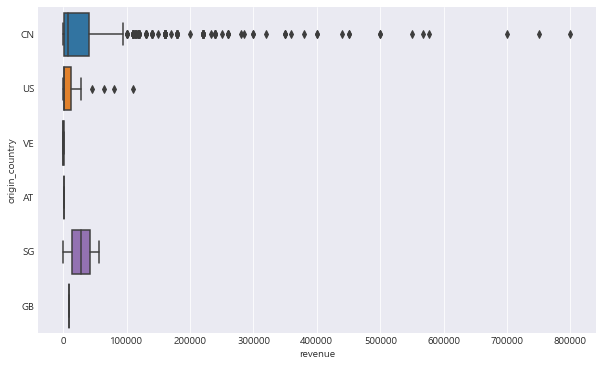

In [86]:
plt.figure(figsize=(10,6))
box=sns.boxplot(x='revenue', y='origin_country', data=sp)
plt.show()

In [87]:
sp.groupby(['origin_country'])['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
origin_country,,,,,,,,
AT,1.0,700.000000,NaN,700.00,700.00,700.0,700.00,700.0
CN,1516.0,35696.088819,73189.824720,2.72,800.00,7000.0,40000.00,800000.0
GB,1.0,9000.000000,NaN,9000.00,9000.00,9000.0,9000.00,9000.0
SG,2.0,28496.500000,39744.350850,393.00,14444.75,28496.5,42548.25,56600.0
US,31.0,13949.096774,26254.310877,110.00,750.00,1200.0,12000.00,110000.0
VE,5.0,684.900000,632.361981,241.50,241.50,241.5,1100.00,1600.0


> 대부분의 데이터가 CN(중국)의 상품이기 때문에 매출과 관련을 찾기 어렵다. 데이터가 31개 있는 US(미국)과 비교해보면 매출 평균과 median은 모두 중국이 높지만, 중국의 경우 편차가 매우 크다(min=2.72, max=800000)는 것을 알 수 있다.

In [90]:
sp.groupby(['product_color'])['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
product_color,,,,,,,,
Army green,2.0,7000.000000,0.000000,7000.0,7000.0,7000.0,7000.0,7000.0
Black,3.0,24666.666667,26312.227829,8000.0,9500.0,11000.0,33000.0,55000.0
Blue,1.0,90000.000000,NaN,90000.0,90000.0,90000.0,90000.0,90000.0
Pink,2.0,23000.000000,24041.630560,6000.0,14500.0,23000.0,31500.0,40000.0
RED,1.0,6000.000000,NaN,6000.0,6000.0,6000.0,6000.0,6000.0
...,...,...,...,...,...,...,...,...
wine,2.0,3250.000000,3889.087297,500.0,1875.0,3250.0,4625.0,6000.0
wine red,1.0,150000.000000,NaN,150000.0,150000.0,150000.0,150000.0,150000.0
winered,28.0,19547.857143,33495.858490,400.0,1100.0,3500.0,13762.5,120000.0


> product color에는 101개의 변수가 있기 때문에 매출과의 관계를 파악하기 어렵다.

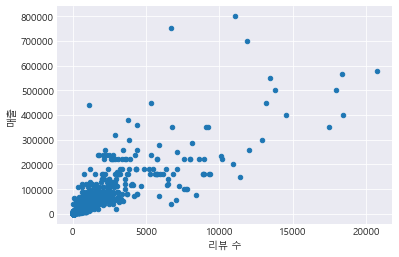

In [91]:
sp.plot.scatter(x='rating_count', y='revenue')
plt.xlabel('리뷰 수')
plt.ylabel('매출')
plt.show()

In [92]:
sp[['revenue','rating_count']].corr(method='pearson')

,revenue,rating_count
revenue,1.000000,0.834427
rating_count,0.834427,1.000000


> 리뷰 수와 매출은 그래프에서도 확인할 수 있듯 양의 상관관계를 보인다. pearson 상관계수를 구한 결과 0.834427로 꽤 유의한 결과를 도출할 수 있었다. 리뷰 수가 많은 제품들은 사람들이 많이 산 제품인 경우가 많고, 자연스럽게 높은 매출과 이어진다.

3. 해당 데이터에서 1) 매출과 rating간의 상관관계와 매출과 2) merchant rating 간의 상관관계를 비교하고 싶을때, 각 변수의 분포를 고려하면 어떤 점에 유의해야 할까요? 

In [80]:
sp[['rating', 'merchant_rating']].describe()

,rating,merchant_rating
count,1573.000000,1573.000000
mean,3.820896,4.032345
std,0.515374,0.204768
min,1.000000,2.333333
25%,3.550000,3.917353
50%,3.850000,4.040650
75%,4.110000,4.161797
max,5.000000,5.000000


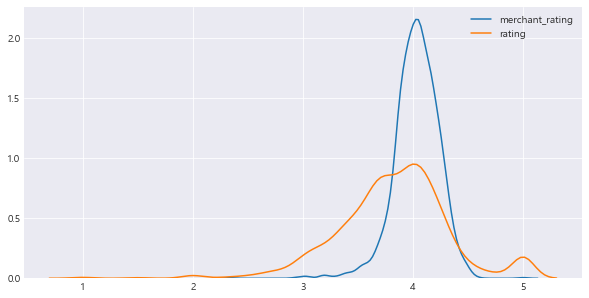

In [81]:
plt.figure(figsize=(10,5))
kdep=sns.kdeplot(sp.merchant_rating) 
kdep=sns.kdeplot(sp.rating) 

In [84]:
sp[['revenue','rating']].corr(method='pearson')

,revenue,rating
revenue,1.00000,0.04298
rating,0.04298,1.00000


In [85]:
sp[['revenue','merchant_rating']].corr(method='pearson')

,revenue,merchant_rating
revenue,1.000000,0.139952
merchant_rating,0.139952,1.000000


> 상관관계 비교 결과, rating의 경우 pearson 상관계수가 0.04298, merchant_rating은 0.139952가 나와 merchant_rating이 매출에 더욱 연관되어있음을 알 수 있다.  
하지만 rating과 merchant_rating의 분포를 보면 평균과 median은 비슷해보일 수 있어도, merchant_rating의 분포가 더 좁게 나타난다. 즉, merchant_rating이 더 후한 경향을 볼 수 있다. 이런 경우, 직접 비교보다는 정규화를 진행해 분포를 맞춘 후 분석을 진행하는 것이 더 적절하다.